# Data Description


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data exploring

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data cleaning

In [6]:
data.duplicated().sum()

0

In [7]:
#No duplicated data

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data.drop('Unnamed: 32', axis = 1, inplace = True)

In [10]:
data.drop('id', axis = 1, inplace = True)

In [11]:
#No Null values

# EDA

In [12]:
def violinplotVisualisation(start_index,end_index):
    df =data.drop('diagnosis',axis=1) #standardise the data diff b/w avg
    df_std = (df - df.mean())/df.std() #subtract mean and divide std
    df = pd.concat([data.diagnosis, df_std.iloc[:, start_index:end_index]],axis=1) #make subgroup of 10 features axis=1 (cols)
    df= pd.melt(df, id_vars = 'diagnosis',
             var_name='features',
             value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x='features',y='value',hue='diagnosis',data=df, split=True,      inner='quart')
    plt.xticks(rotation=45)

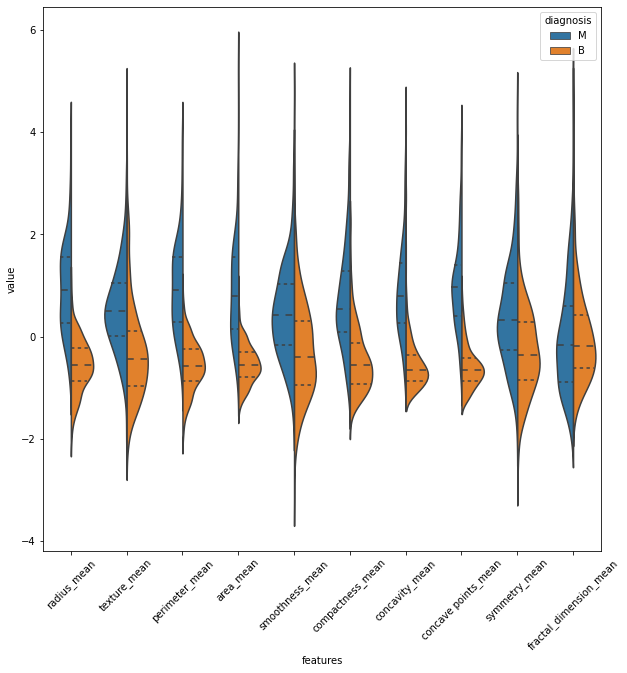

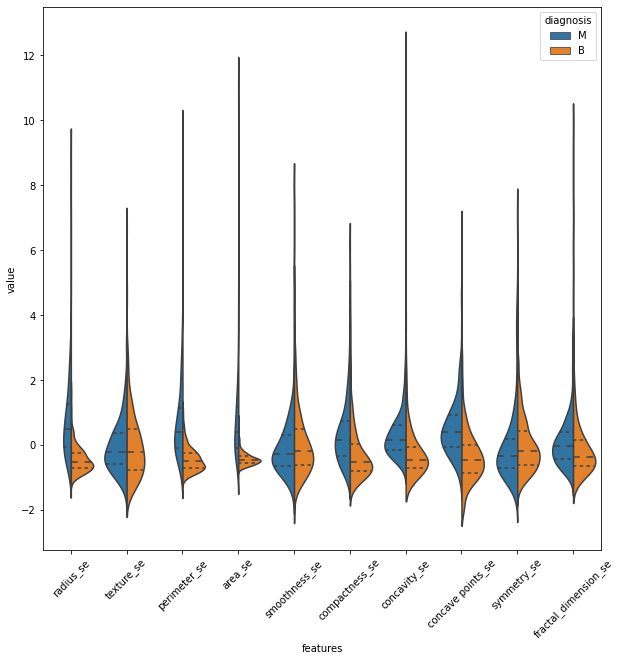

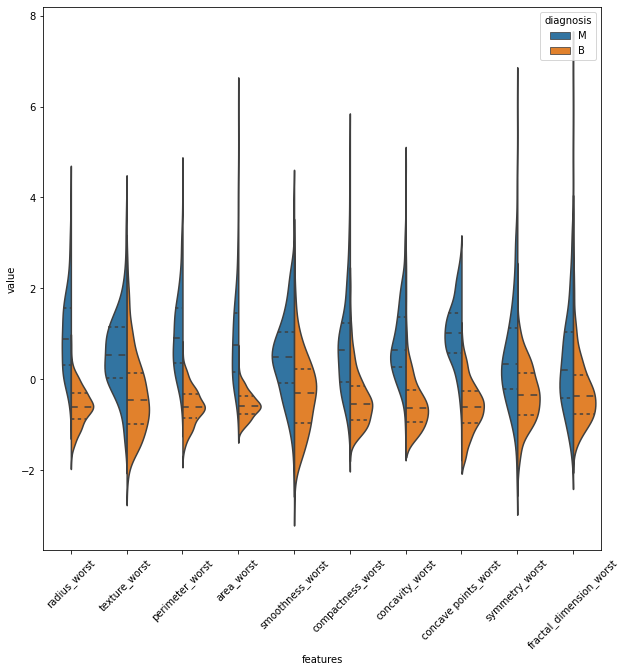

In [13]:
violinplotVisualisation(0,10)
violinplotVisualisation(10,20)
violinplotVisualisation(20,30)

In [14]:
def swarmplotVisualisation(start_index, end_index):
    sns.set(style='whitegrid', palette='muted')
    df =data.drop('diagnosis',axis=1) #standardise the data diff b/w avg
    df_std = (df - df.mean())/df.std() #subtract mean and divide std
    df = pd.concat([data.diagnosis, df_std.iloc[:, start_index:end_index]],axis=1) #make subgroup of 10 features axis=1 (cols)
    df= pd.melt(df, id_vars = 'diagnosis',
             var_name='features',
             value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='features',y='value',hue='diagnosis',data=df)
    plt.xticks(rotation=45)

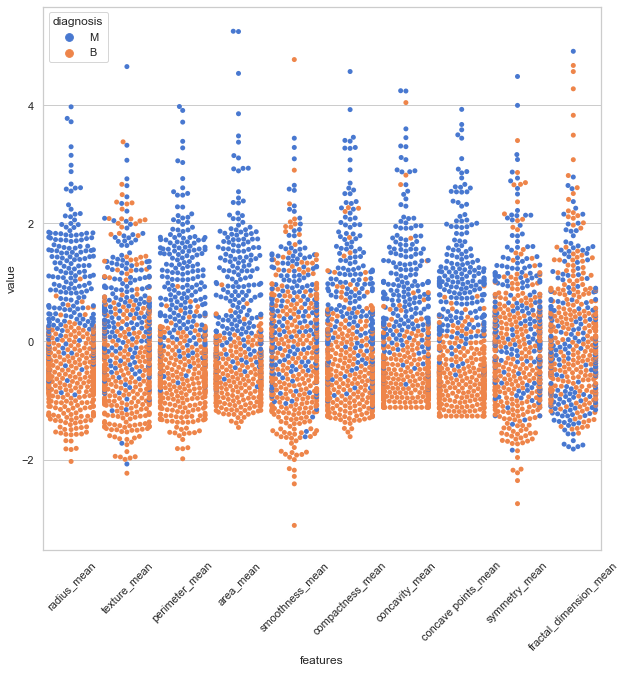

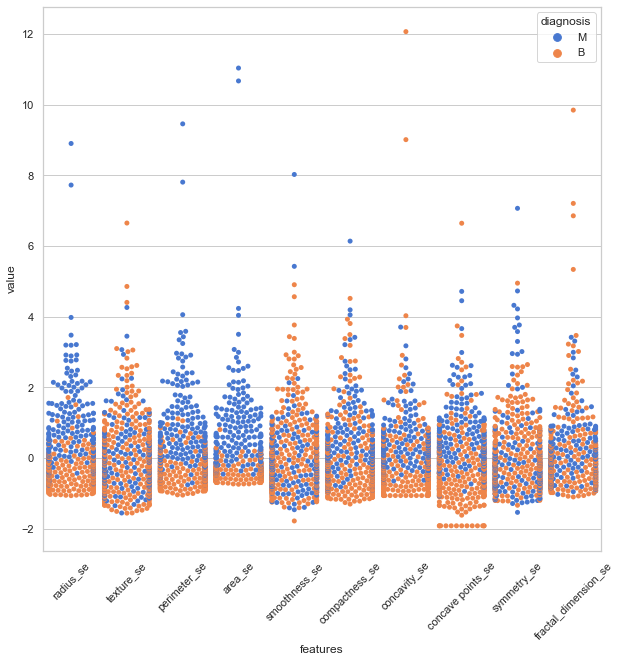

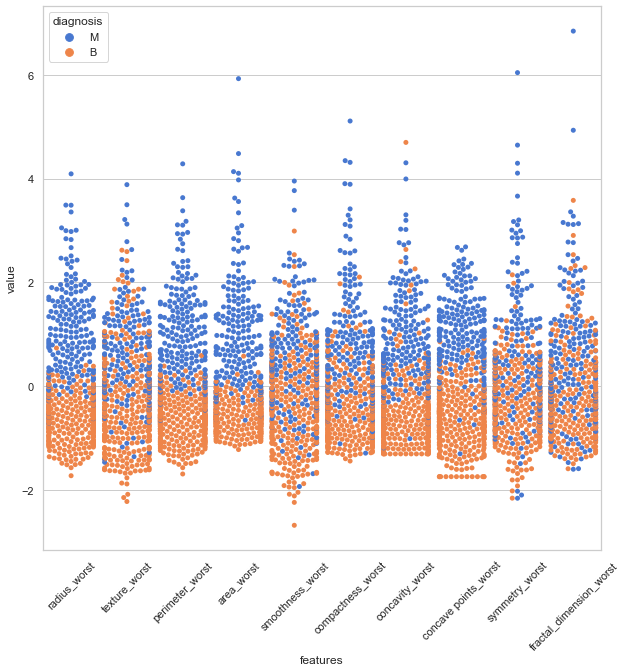

In [15]:
swarmplotVisualisation(0,10)
swarmplotVisualisation(10,20)
swarmplotVisualisation(20,30)

# Data Preprocessing

**Feature selection with correlation**

Text(0.5, 1.05, 'Correlation of df Features')

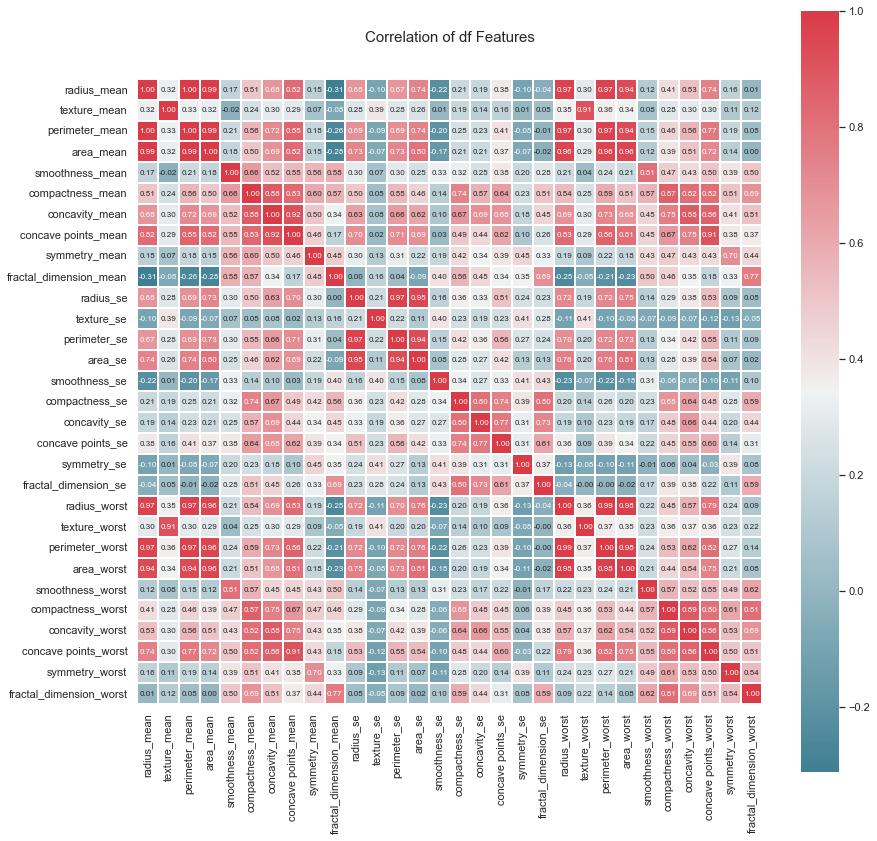

In [16]:
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

As we can see many features are correlated to each other so we will remove highly correlated features bigger than 0.95

In [17]:
data.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
, axis = 1, inplace = True)

In [18]:
data.shape

(569, 24)

**Data imbalancing and encoding** 

In [19]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

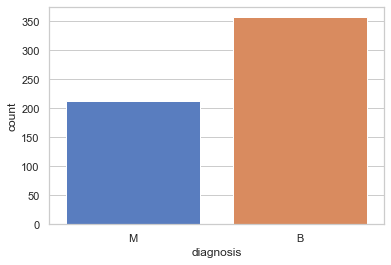

In [20]:
sns.countplot(x = 'diagnosis', data = data)

The data is slightly imbalanced , we don't need to use over or under sampling 

In [21]:
data['diagnosis'].replace(['M', 'B'], [1, 0], inplace = True)

In [22]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [23]:
#now all the data are numerical

# Train test split 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop('diagnosis',axis=1).values
y = data['diagnosis'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Data scalling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
X_train_scale = sc.fit_transform(X_train)

In [30]:
X_test_scaled=sc.transform(X_test)

# Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

In [32]:
data.shape

(569, 24)

In [33]:
model = Sequential()

In [34]:
model.add(Dense(23))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation ='sigmoid')) 

In [35]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(x=X_train_scale, y=y_train, validation_data=(X_test_scaled, y_test),batch_size=250 , epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 372ms/step - loss: 0.7006 - accuracy: 0.3756 - val_loss: 0.6927 - val_accuracy: 0.3986
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 0.6918 - accuracy: 0.4038 - val_loss: 0.6860 - val_accuracy: 0.4336
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6844 - accuracy: 0.4601 - val_loss: 0.6794 - val_accuracy: 0.5035
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6774 - accuracy: 0.5117 - val_loss: 0.6724 - val_accuracy: 0.5734
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6703 - accuracy: 0.5869 - val_loss: 0.6647 - val_accuracy: 0.6084
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6628 - accuracy: 0.6385 - val_loss: 0.6556 - val_accuracy: 0.6573
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6545 - accuracy: 0.6995 - val_loss: 0.6445 - val_accuracy: 0.7343
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 43ms/step - loss: 0.0941 - accuracy: 0.9742 - val_loss: 0.0927 - val_accuracy: 0.9720
Epoch 60/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0920 - accuracy: 0.9742 - val_loss: 0.0910 - val_accuracy: 0.9720
Epoch 61/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0902 - accuracy: 0.9742 - val_loss: 0.0893 - val_accuracy: 0.9720
Epoch 62/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0883 - accuracy: 0.9742 - val_loss: 0.0878 - val_accuracy: 0.9720
Epoch 63/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0867 - accuracy: 0.9742 - val_loss: 0.0865 - val_accuracy: 0.9720
Epoch 64/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0853 - accuracy: 0.9742 - val_loss: 0.0852 - val_accuracy: 0.9720
Epoch 65/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0838 - accuracy: 0.9765 - val_loss: 0.0839 - val_accuracy: 0.9720
Epoch 66/100
2/2 [========

In [37]:
Loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

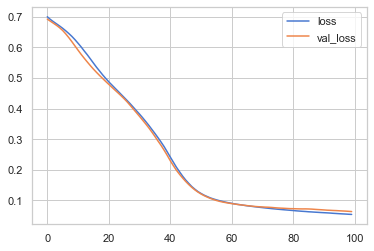

In [38]:
Loss[['loss','val_loss']].plot()

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 16)                384       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainabl

 **Evaluation**

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
prediction = model.predict(X_test_scaled)
prediction


5/5 [==============================] - 0s 2ms/step


array([[8.19604937e-03],
       [3.74065689e-03],
       [1.78763631e-03],
       [9.42008495e-01],
       [1.00337755e-04],
       [4.69569437e-04],
       [1.38052960e-03],
       [1.00000000e+00],
       [3.39657348e-03],
       [2.90577905e-03],
       [9.99957383e-01],
       [3.89382563e-04],
       [1.02264471e-01],
       [2.46416748e-04],
       [9.99494910e-01],
       [6.89444714e-04],
       [4.27513476e-03],
       [4.34245029e-03],
       [9.99996603e-01],
       [9.51934278e-01],
       [3.24153602e-02],
       [5.89908159e-04],
       [1.16707468e-02],
       [1.57203712e-03],
       [9.99933660e-01],
       [4.34370972e-02],
       [9.99899089e-01],
       [1.48916142e-05],
       [9.99972999e-01],
       [9.99697268e-01],
       [8.33818138e-01],
       [9.99743223e-01],
       [1.68353647e-01],
       [9.31824684e-01],
       [8.20286077e-05],
       [4.68016915e-05],
       [9.94750977e-01],
       [9.60750222e-01],
       [9.99994218e-01],
       [9.99999642e-01],


In [42]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.96      0.98      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [43]:
print(confusion_matrix(y_test,prediction.round()))

[[86  2]
 [ 1 54]]


<AxesSubplot:>

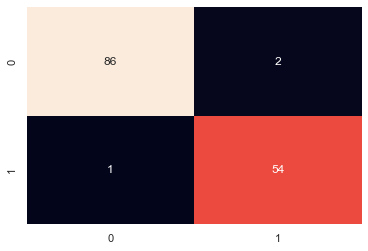

In [44]:
matrix= confusion_matrix(y_test , prediction.round())
sns.heatmap(matrix,cbar=False, annot=True)